In [1]:
%matplotlib inline

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram , plot_bloch_multivector
import matplotlib.pyplot as plt
from qiskit.quantum_info import partial_trace
import numpy as np


Results when Alice applies no operation:
{'11': 487, '00': 513}


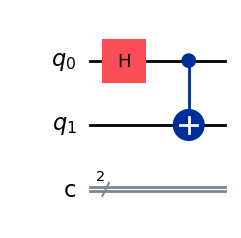

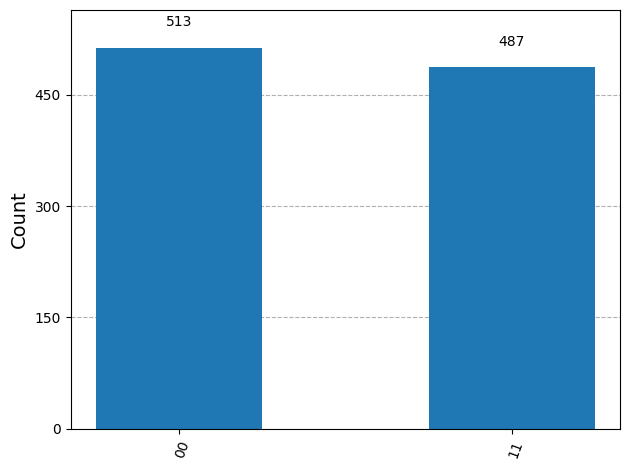

Results when Alice applies X:
{'10': 515, '01': 485}


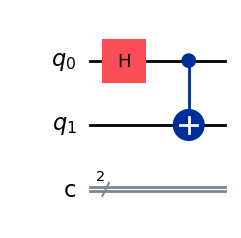

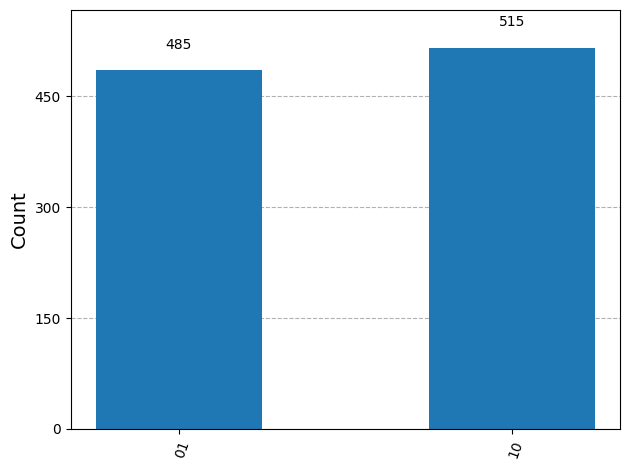

Results when Alice applies Z:
{'11': 486, '00': 514}


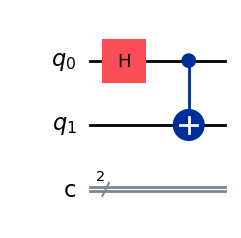

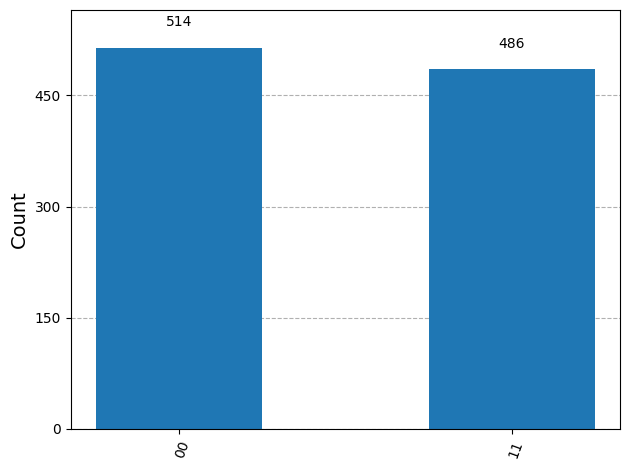

Results when Alice applies H:
{'10': 241, '11': 252, '00': 246, '01': 261}


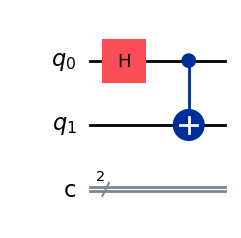

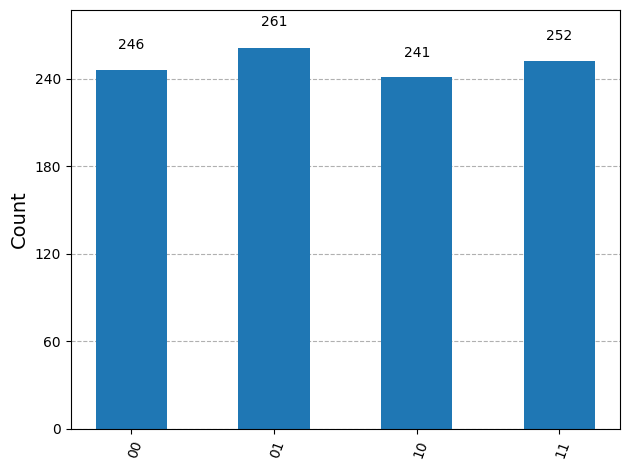

In [2]:
#QUESTION 1 NORMAL

def alice(op):
    qop = QuantumCircuit(2, 2)
    qop.h(0)
    qop.cx(0, 1)
    qop.draw('mpl')
    if op == 'X':
        qop.x(0)
    elif op == 'Z':
        qop.z(0)
    elif op == 'H':
        qop.h(0)
    elif op is None:
        pass
    else:
        raise ValueError("Operation must be 'X', 'Z', 'H', or None")
    return qop

def measure_and_visualize(op):
    circuit = alice(op)
    circuit.measure([0, 1], [0, 1])
    simulator = AerSimulator()
    job = simulator.run(circuit, shots=1000)
    result = job.result()
    counts = result.get_counts()
    print(f"Results when Alice applies {op or 'no operation'}:")
    print(counts)
    plot_histogram(counts)
    plt.show()

for operation in [None, 'X', 'Z', 'H']:
    measure_and_visualize(operation)


Results when Alice applies no operation:
{'111': 504, '000': 496}


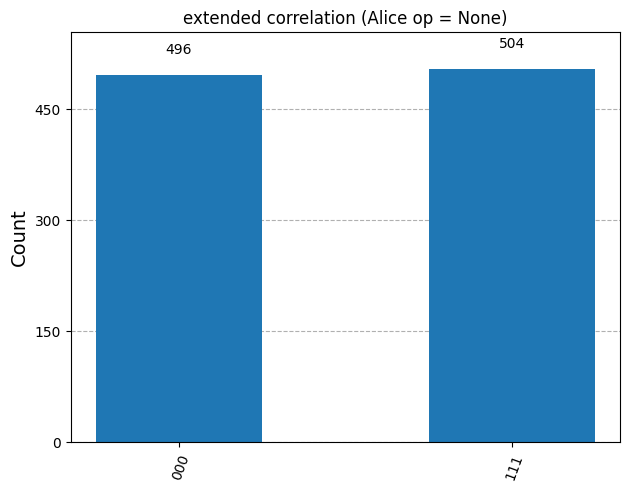


Results when Alice applies X:
{'001': 485, '110': 515}


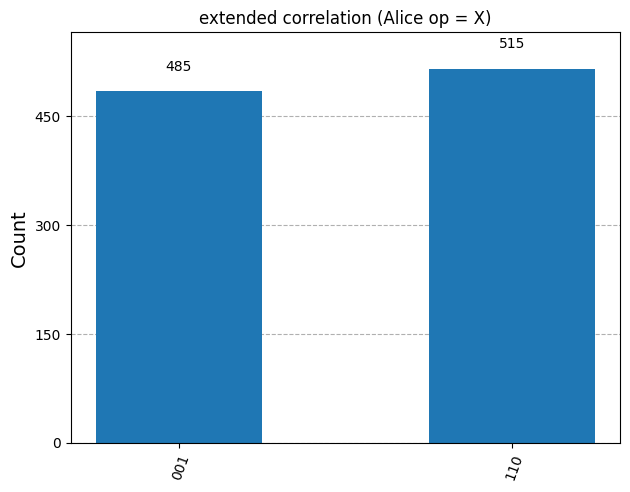


Results when Alice applies Z:
{'000': 500, '111': 500}


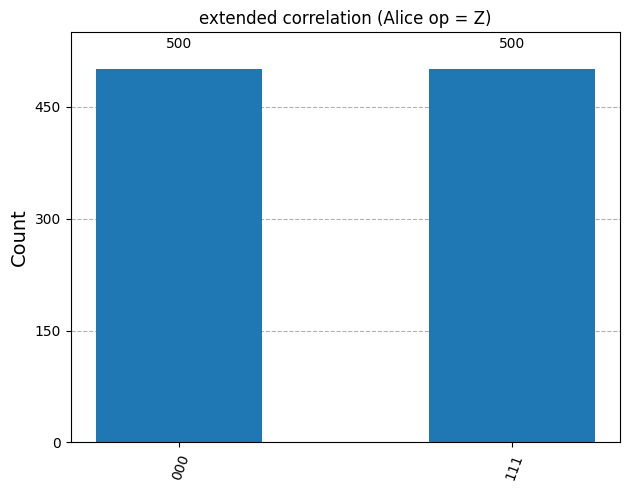


Results when Alice applies H:
{'000': 275, '111': 254, '001': 227, '110': 244}


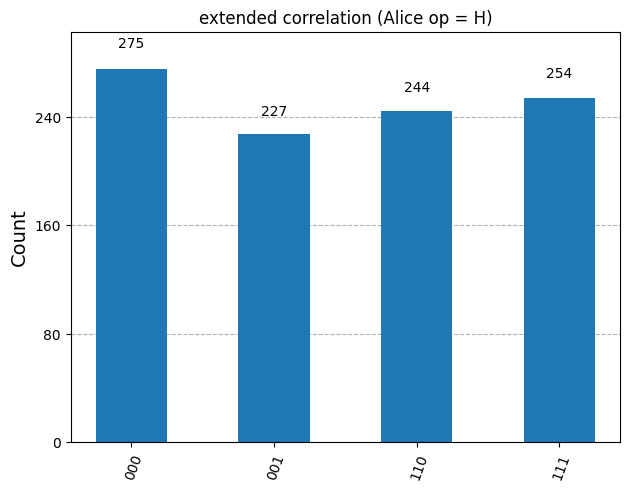

In [8]:
#QUESTION 1 STRETCH GOAL
def ex_alice(op):
    q = QuantumCircuit(3, 3)
    q.h(0)
    q.cx(0, 1)
    q.cx(0, 2)

    if op == 'X':
        q.x(0)
    elif op == 'Z':
        q.z(0)
    elif op == 'H':
        q.h(0)
    elif op is None:
        pass
    else:
        raise ValueError("Operation must be 'X', 'Z', 'H', or None")

    q.measure([0, 1, 2], [0, 1, 2])
    simulator = AerSimulator()
    result = simulator.run(q, shots=1000).result()
    counts = result.get_counts()

    print(f"\nResults when Alice applies {op or 'no operation'}:")
    print(counts)

    plot_histogram(counts)
    plt.title(f"extended correlation (Alice op = {op or 'None'})")
    plt.show()

for operation in [None, 'X', 'Z', 'H']:
    ex_alice(operation)

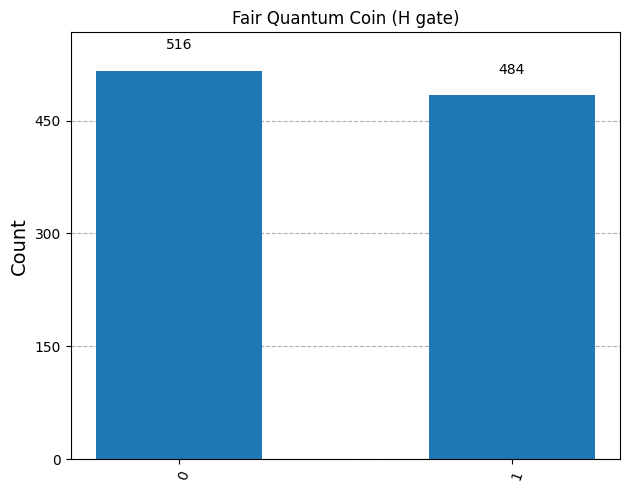

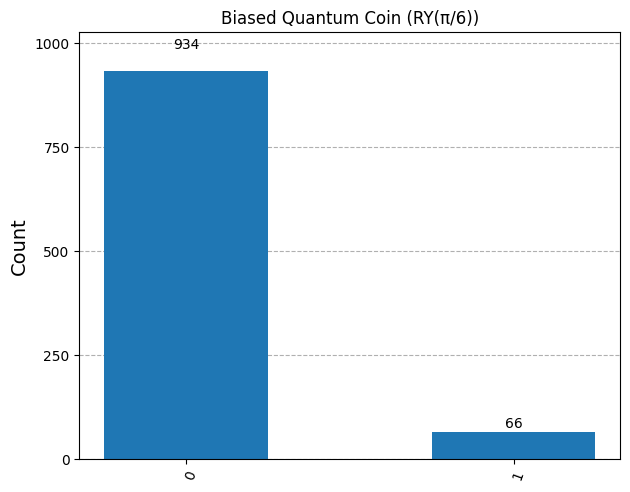

In [4]:
#QUESTION 2 NORMAL

def quantum_coin(theta=None):
    q = QuantumCircuit(1, 1)
    if theta is None:
        q.h(0)
    else:
        q.ry(theta, 0)
    q.measure(0, 0)
    simulator = AerSimulator()
    job = simulator.run(q, shots=1000)
    result = job.result()
    counts = result.get_counts()
    return counts

def visualize_coin(counts, title):
    plot_histogram(counts)
    plt.title(title)
    plt.show()

counts_fair = quantum_coin()
visualize_coin(counts_fair, "Fair Quantum Coin (H gate)")

counts_biased = quantum_coin(np.pi / 6)
visualize_coin(counts_biased, "Biased Quantum Coin (RY(π/6))")

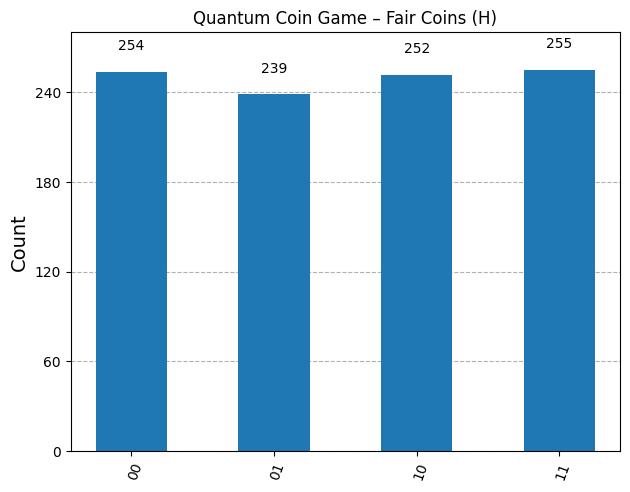

Winner: Alice


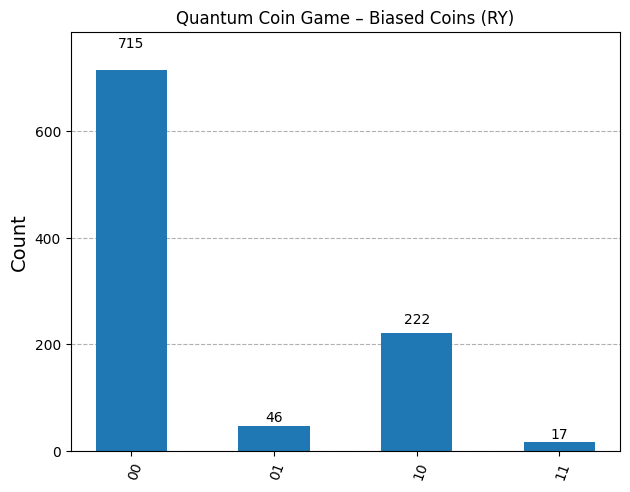

Winner: Alice


In [5]:
#question 2 stretched
def quantum_coin_game(theta_a=None, theta_b=None):
    q = QuantumCircuit(2, 2)
    if theta_a is None:
        q.h(0)
    else:
        q.ry(theta_a, 0)
    if theta_b is None:
        q.h(1)
    else:
        q.ry(theta_b, 1)
    q.measure([0, 1], [0, 1])
    simulator = AerSimulator()
    result = simulator.run(q, shots=1000).result()
    counts = result.get_counts()
    return counts

def visualize_results(counts, title):
    plot_histogram(counts)
    plt.title(title)
    plt.show()

def determine_winner(counts):
    heads_a = sum(v for k, v in counts.items() if k[1] == '0')
    heads_b = sum(v for k, v in counts.items() if k[0] == '0')
    if heads_a > heads_b:
        winner = "Alice"
    elif heads_b > heads_a:
        winner = "Bob"
    else:
        winner = "Tie"
    print(f"Winner: {winner}")

counts_fair = quantum_coin_game()
visualize_results(counts_fair, "Quantum Coin Game – Fair Coins (H)")
determine_winner(counts_fair)

counts_biased = quantum_coin_game(np.pi/6, np.pi/3)
visualize_results(counts_biased, "Quantum Coin Game – Biased Coins (RY)")
determine_winner(counts_biased)

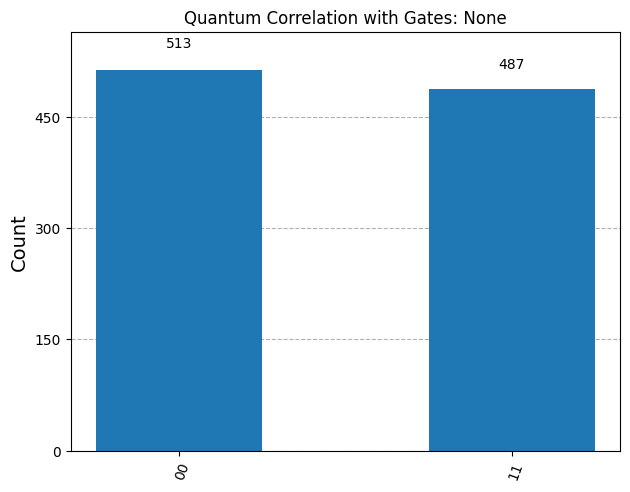

Gates applied: None
{'00': 513, '11': 487}


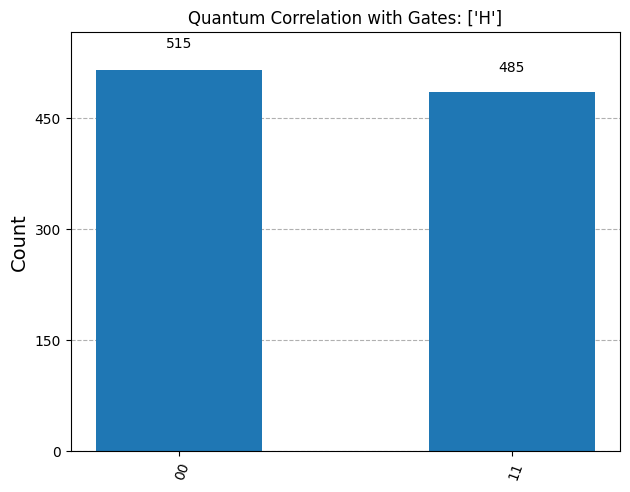

Gates applied: ['H']
{'11': 485, '00': 515}


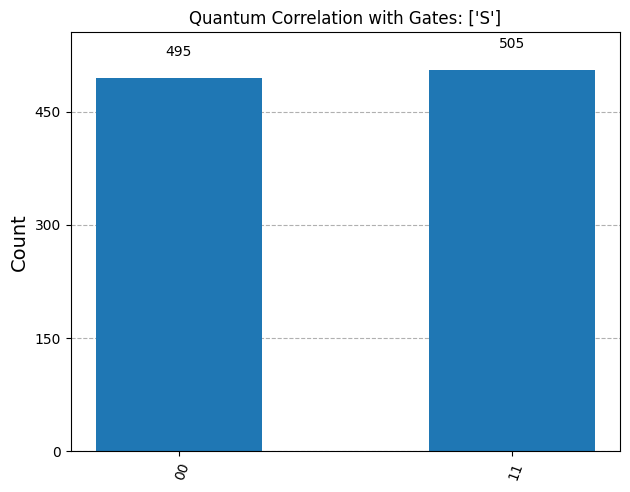

Gates applied: ['S']
{'11': 505, '00': 495}


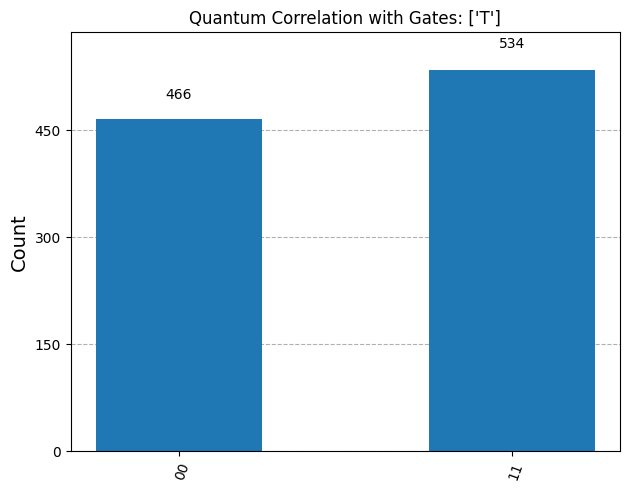

Gates applied: ['T']
{'00': 466, '11': 534}


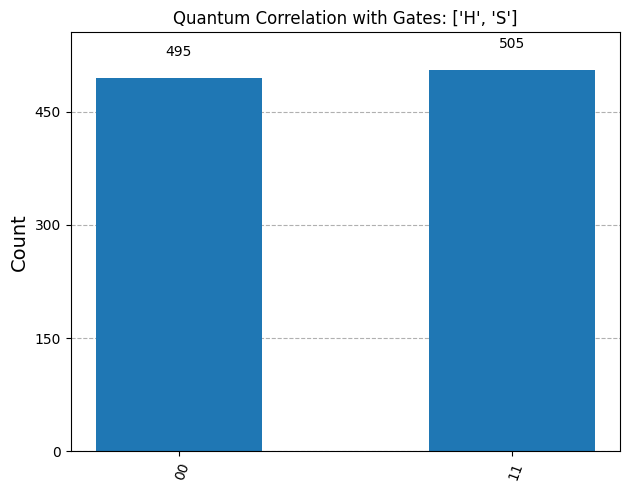

Gates applied: ['H', 'S']
{'11': 505, '00': 495}


In [6]:
#QUESTION 3 NORMAL

def correlation_explorer(gates=None):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    if gates:
        for g in gates:
            if g == 'H':
                qc.h([0, 1])
            elif g == 'S':
                qc.s([0, 1])
            elif g == 'T':
                qc.t([0, 1])
    qc.measure([0, 1], [0, 1])
    simulator = AerSimulator()
    result = simulator.run(qc, shots=1000).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.title(f"Quantum Correlation with Gates: {gates or 'None'}")
    plt.show()
    print(f"Gates applied: {gates or 'None'}")
    print(counts)

correlation_explorer()
correlation_explorer(['H'])
correlation_explorer(['S'])
correlation_explorer(['T'])
correlation_explorer(['H', 'S'])


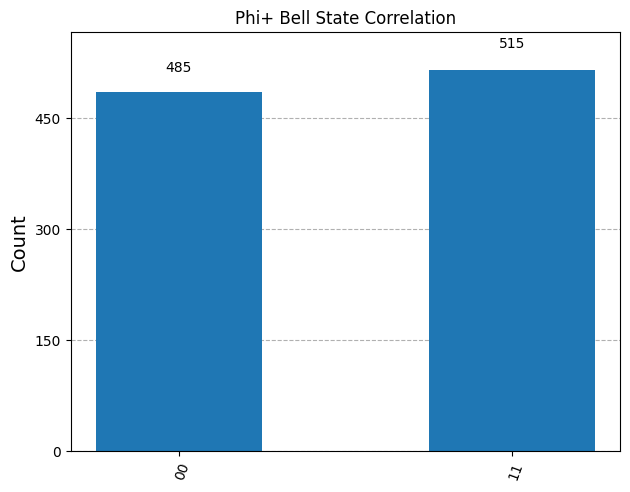

Phi+ state results:
{'11': 515, '00': 485}


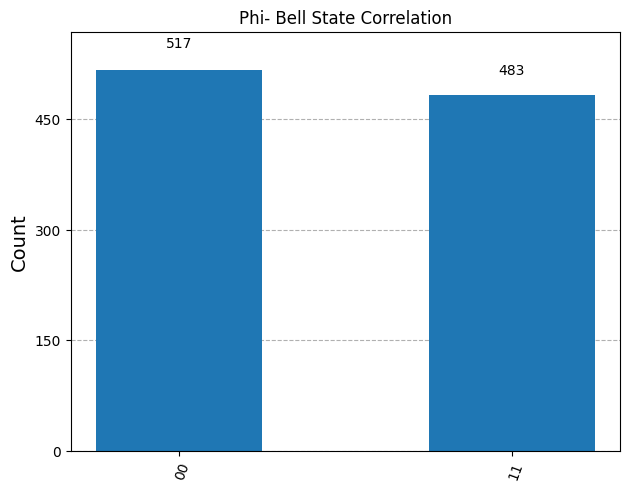

Phi- state results:
{'00': 517, '11': 483}


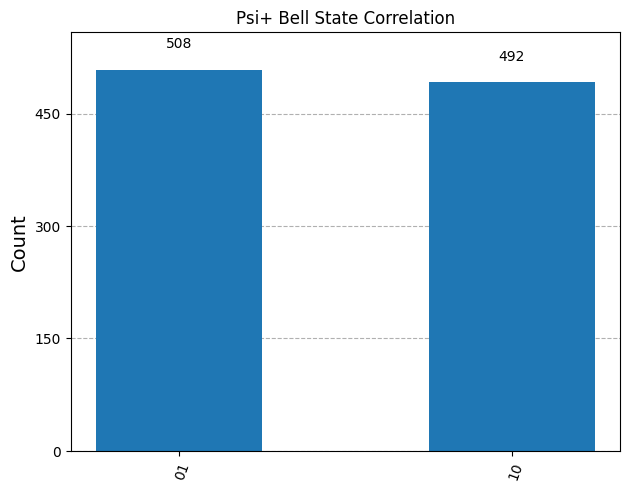

Psi+ state results:
{'10': 492, '01': 508}


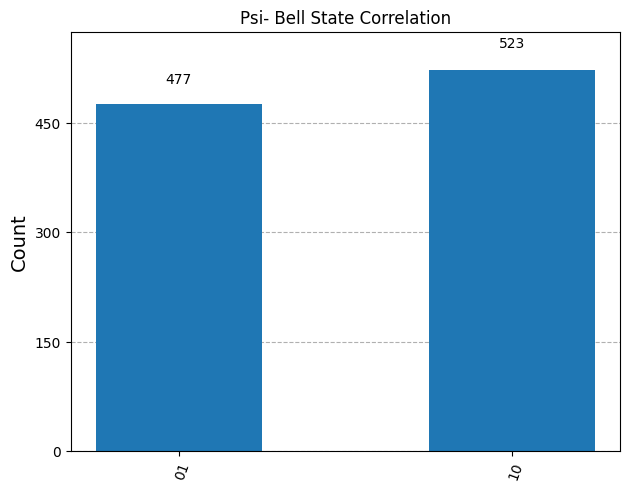

Psi- state results:
{'01': 477, '10': 523}


In [7]:
#question 3 stretch

def bell_state(state):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    if state == 'Phi-':
        qc.z(0)
    elif state == 'Psi+':
        qc.x(1)
    elif state == 'Psi-':
        qc.x(1)
        qc.z(0)
    qc.measure([0, 1], [0, 1])
    return qc

def simulate_bell(state):
    qc = bell_state(state)
    simulator = AerSimulator()
    result = simulator.run(qc, shots=1000).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.title(f"{state} Bell State Correlation")
    plt.show()
    print(f"{state} state results:")
    print(counts)

simulate_bell('Phi+')
simulate_bell('Phi-')
simulate_bell('Psi+')
simulate_bell('Psi-')
